In [3]:
import os
os.chdir('..')
os.getcwd()

Dataset size: 42863
Analyzing dataset class distribution...
Total samples: 42863
Number of classes: 18

Class distribution:
Class 0: 3000.0 samples (7.00%)
Class 1: 2999.0 samples (7.00%)
Class 2: 3000.0 samples (7.00%)
Class 3: 2999.0 samples (7.00%)
Class 4: 3000.0 samples (7.00%)
Class 5: 3000.0 samples (7.00%)
Class 6: 3000.0 samples (7.00%)
Class 7: 3000.0 samples (7.00%)
Class 8: 2999.0 samples (7.00%)
Class 9: 3000.0 samples (7.00%)
Class 10: 3000.0 samples (7.00%)
Class 11: 3000.0 samples (7.00%)
Class 12: 3000.0 samples (7.00%)
Class 13: 3000.0 samples (7.00%)
Class 14: 2998.0 samples (6.99%)
Class 15: 3000.0 samples (7.00%)
Class 16: 3000.0 samples (7.00%)
Class 17: 3000.0 samples (7.00%)

Calculated positive class weights:
Class 0: 7.144
Class 1: 7.146
Class 2: 7.144
Class 3: 7.146
Class 4: 7.144
Class 5: 7.144
Class 6: 7.144
Class 7: 7.144
Class 8: 7.146
Class 9: 7.144
Class 10: 7.144
Class 11: 7.144
Class 12: 7.144
Class 13: 7.144
Class 14: 7.149
Class 15: 7.144
Class 16: 

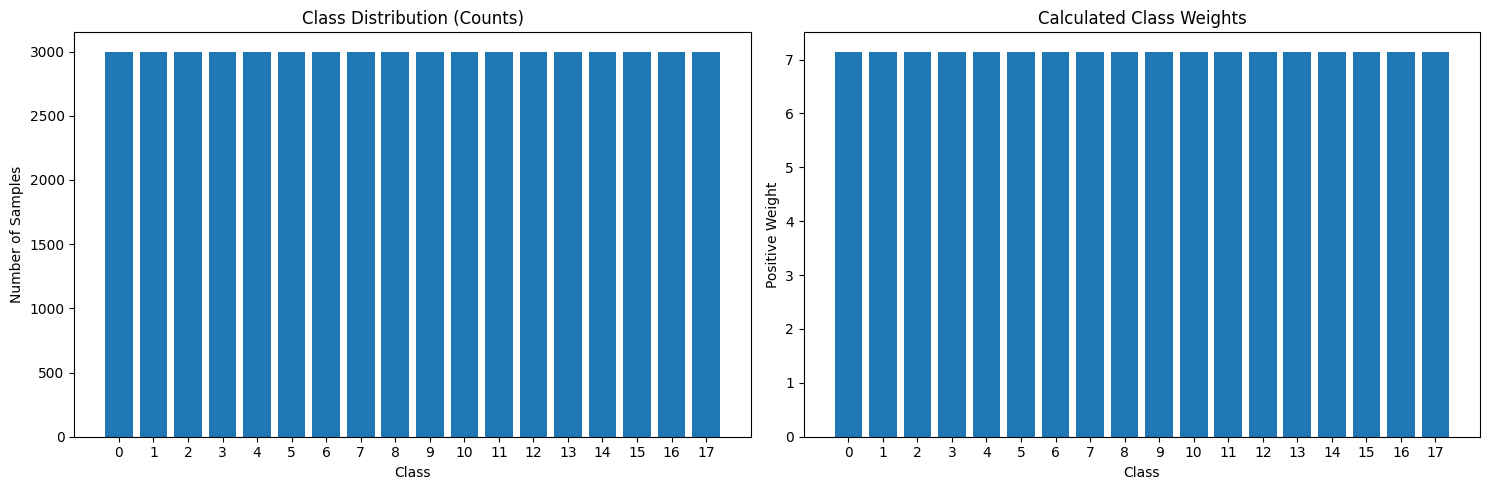


Class Statistics Summary:
    Class   Count  Percentage
0       0  3000.0    6.999043
1       1  2999.0    6.996711
2       2  3000.0    6.999043
3       3  2999.0    6.996711
4       4  3000.0    6.999043
5       5  3000.0    6.999043
6       6  3000.0    6.999043
7       7  3000.0    6.999043
8       8  2999.0    6.996711
9       9  3000.0    6.999043
10     10  3000.0    6.999043
11     11  3000.0    6.999043
12     12  3000.0    6.999043
13     13  3000.0    6.999043
14     14  2998.0    6.994377
15     15  3000.0    6.999043
16     16  3000.0    6.999043
17     17  3000.0    6.999043

Class imbalance ratio: 1.00
Most frequent class: 3000.0 samples
Least frequent class: 2998.0 samples


In [6]:
import torch
from torch.utils.data import DataLoader
from datasets.topic_datasets import TopicDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load the dataset
dataset = TopicDataset(
    genome='data/resources/mm10.fa',
    region_topic_bed='data/CTdnsmpl_catlas_35_Topics_top_3k/regions_and_topics_sorted.bed',
    transform=None,  # Use default one-hot encoding
    target_transform=None  # Use default target transformation
)

print(f"Dataset size: {len(dataset)}")

def analyze_dataset_distribution(dataset):
    """Analyze the class distribution in the dataset"""
    print("Analyzing dataset class distribution...")
    
    # Collect all labels
    all_labels = []
    for i in range(len(dataset)):
        sample = dataset[i]
        all_labels.append(sample['label'].numpy())
    
    all_labels = np.array(all_labels)  # Shape: (num_samples, num_classes)
    
    # Calculate class frequencies
    class_counts = np.sum(all_labels, axis=0)
    total_samples = len(dataset)
    
    print(f"Total samples: {total_samples}")
    print(f"Number of classes: {len(class_counts)}")
    print("\nClass distribution:")
    
    # Create a DataFrame for better visualization
    class_stats = []
    for i, count in enumerate(class_counts):
        percentage = (count / total_samples) * 100
        print(f"Class {i}: {count} samples ({percentage:.2f}%)")
        class_stats.append({
            'Class': i,
            'Count': count,
            'Percentage': percentage
        })
    
    df_stats = pd.DataFrame(class_stats)
    
    # Calculate class weights (inverse frequency)
    pos_weights = total_samples / (2 * class_counts)
    # Clip weights to prevent extreme values
    pos_weights = np.clip(pos_weights, 0.1, 10.0)
    
    print(f"\nCalculated positive class weights:")
    for i, weight in enumerate(pos_weights):
        print(f"Class {i}: {weight:.3f}")
    
    # Visualize class distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(class_counts)), class_counts)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution (Counts)')
    plt.xticks(range(len(class_counts)))
    
    plt.subplot(1, 2, 2)
    plt.bar(range(len(pos_weights)), pos_weights)
    plt.xlabel('Class')
    plt.ylabel('Positive Weight')
    plt.title('Calculated Class Weights')
    plt.xticks(range(len(pos_weights)))
    
    plt.tight_layout()
    plt.show()
    
    return torch.tensor(pos_weights, dtype=torch.float32), class_counts, all_labels, df_stats

# Analyze the dataset
pos_weights, class_counts, all_labels, df_stats = analyze_dataset_distribution(dataset)

# Display the statistics DataFrame
print("\nClass Statistics Summary:")
print(df_stats)

# Check for class imbalance
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}")
print(f"Most frequent class: {class_counts.max()} samples")
print(f"Least frequent class: {class_counts.min()} samples")


Average labels per sample: 1.26
Min labels per sample: 1.0
Max labels per sample: 5.0


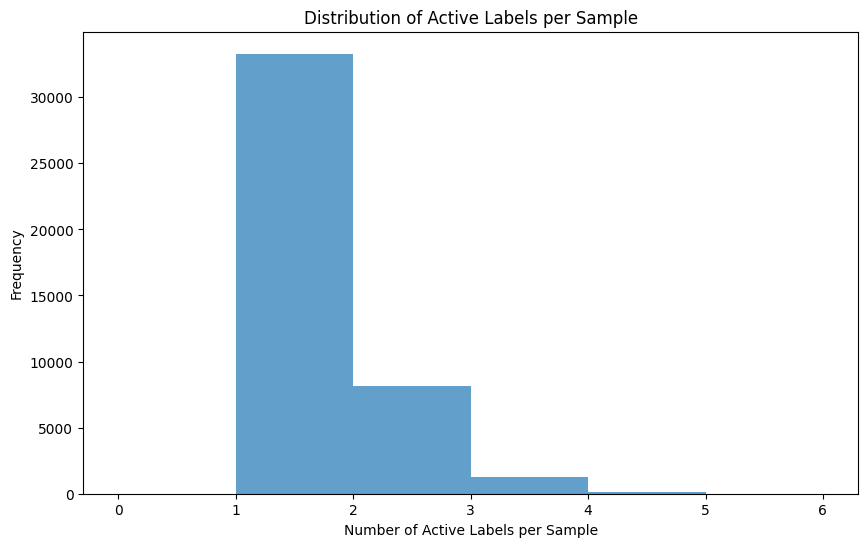

In [7]:
# Check how many labels each sample has on average
labels_per_sample = all_labels.sum(axis=1)
print(f"Average labels per sample: {labels_per_sample.mean():.2f}")
print(f"Min labels per sample: {labels_per_sample.min()}")
print(f"Max labels per sample: {labels_per_sample.max()}")

# This will tell us if samples typically have multiple active classes
plt.figure(figsize=(10, 6))
plt.hist(labels_per_sample, bins=range(int(labels_per_sample.max()) + 2), alpha=0.7)
plt.xlabel('Number of Active Labels per Sample')
plt.ylabel('Frequency')
plt.title('Distribution of Active Labels per Sample')
plt.show()


Analyzing label co-occurrence...


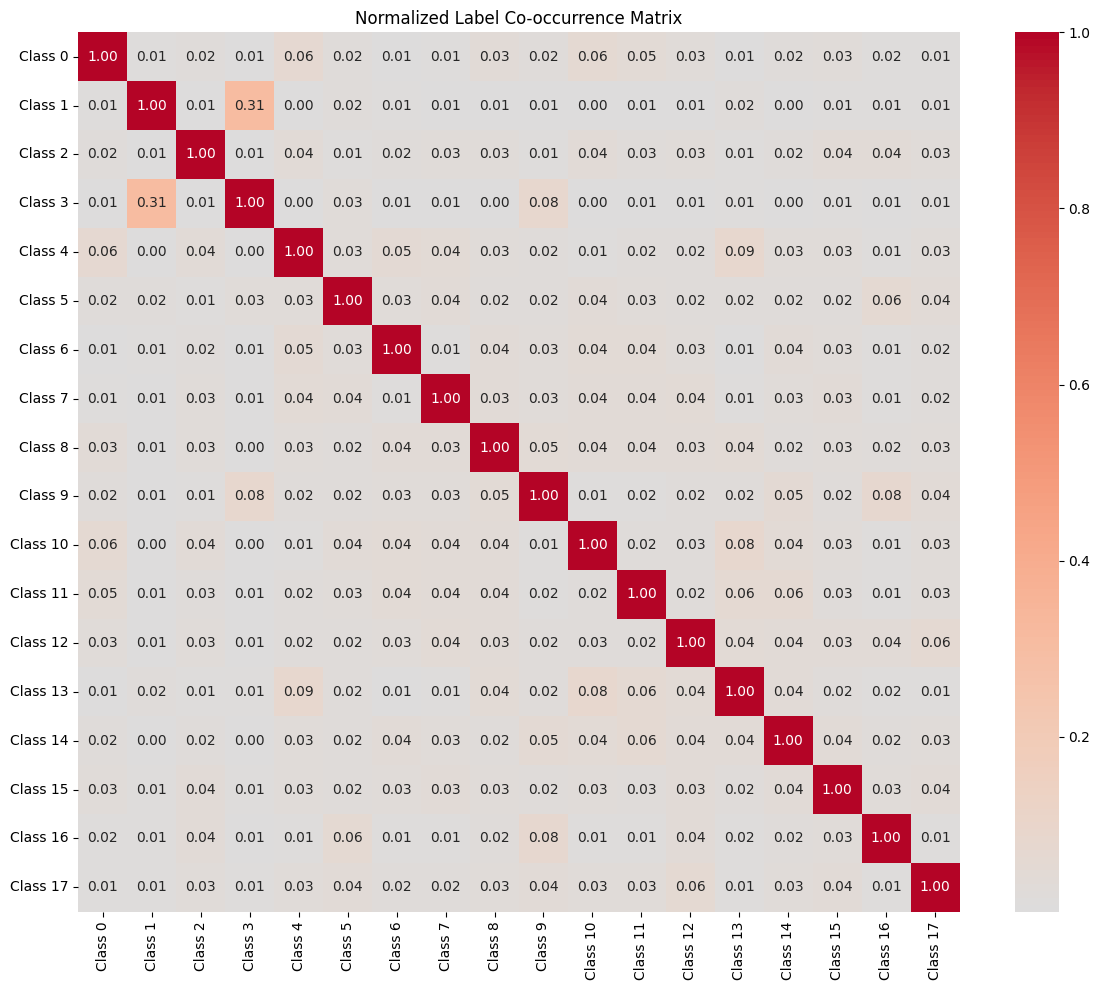


Sample sequences and their labels:
Sample 0: Sequence shape: torch.Size([500, 4]), Active classes: [9]
Sample 1: Sequence shape: torch.Size([500, 4]), Active classes: [8]
Sample 2: Sequence shape: torch.Size([500, 4]), Active classes: [13]
Sample 3: Sequence shape: torch.Size([500, 4]), Active classes: [8, 11]
Sample 4: Sequence shape: torch.Size([500, 4]), Active classes: [4]

Generating baseline confusion matrices...


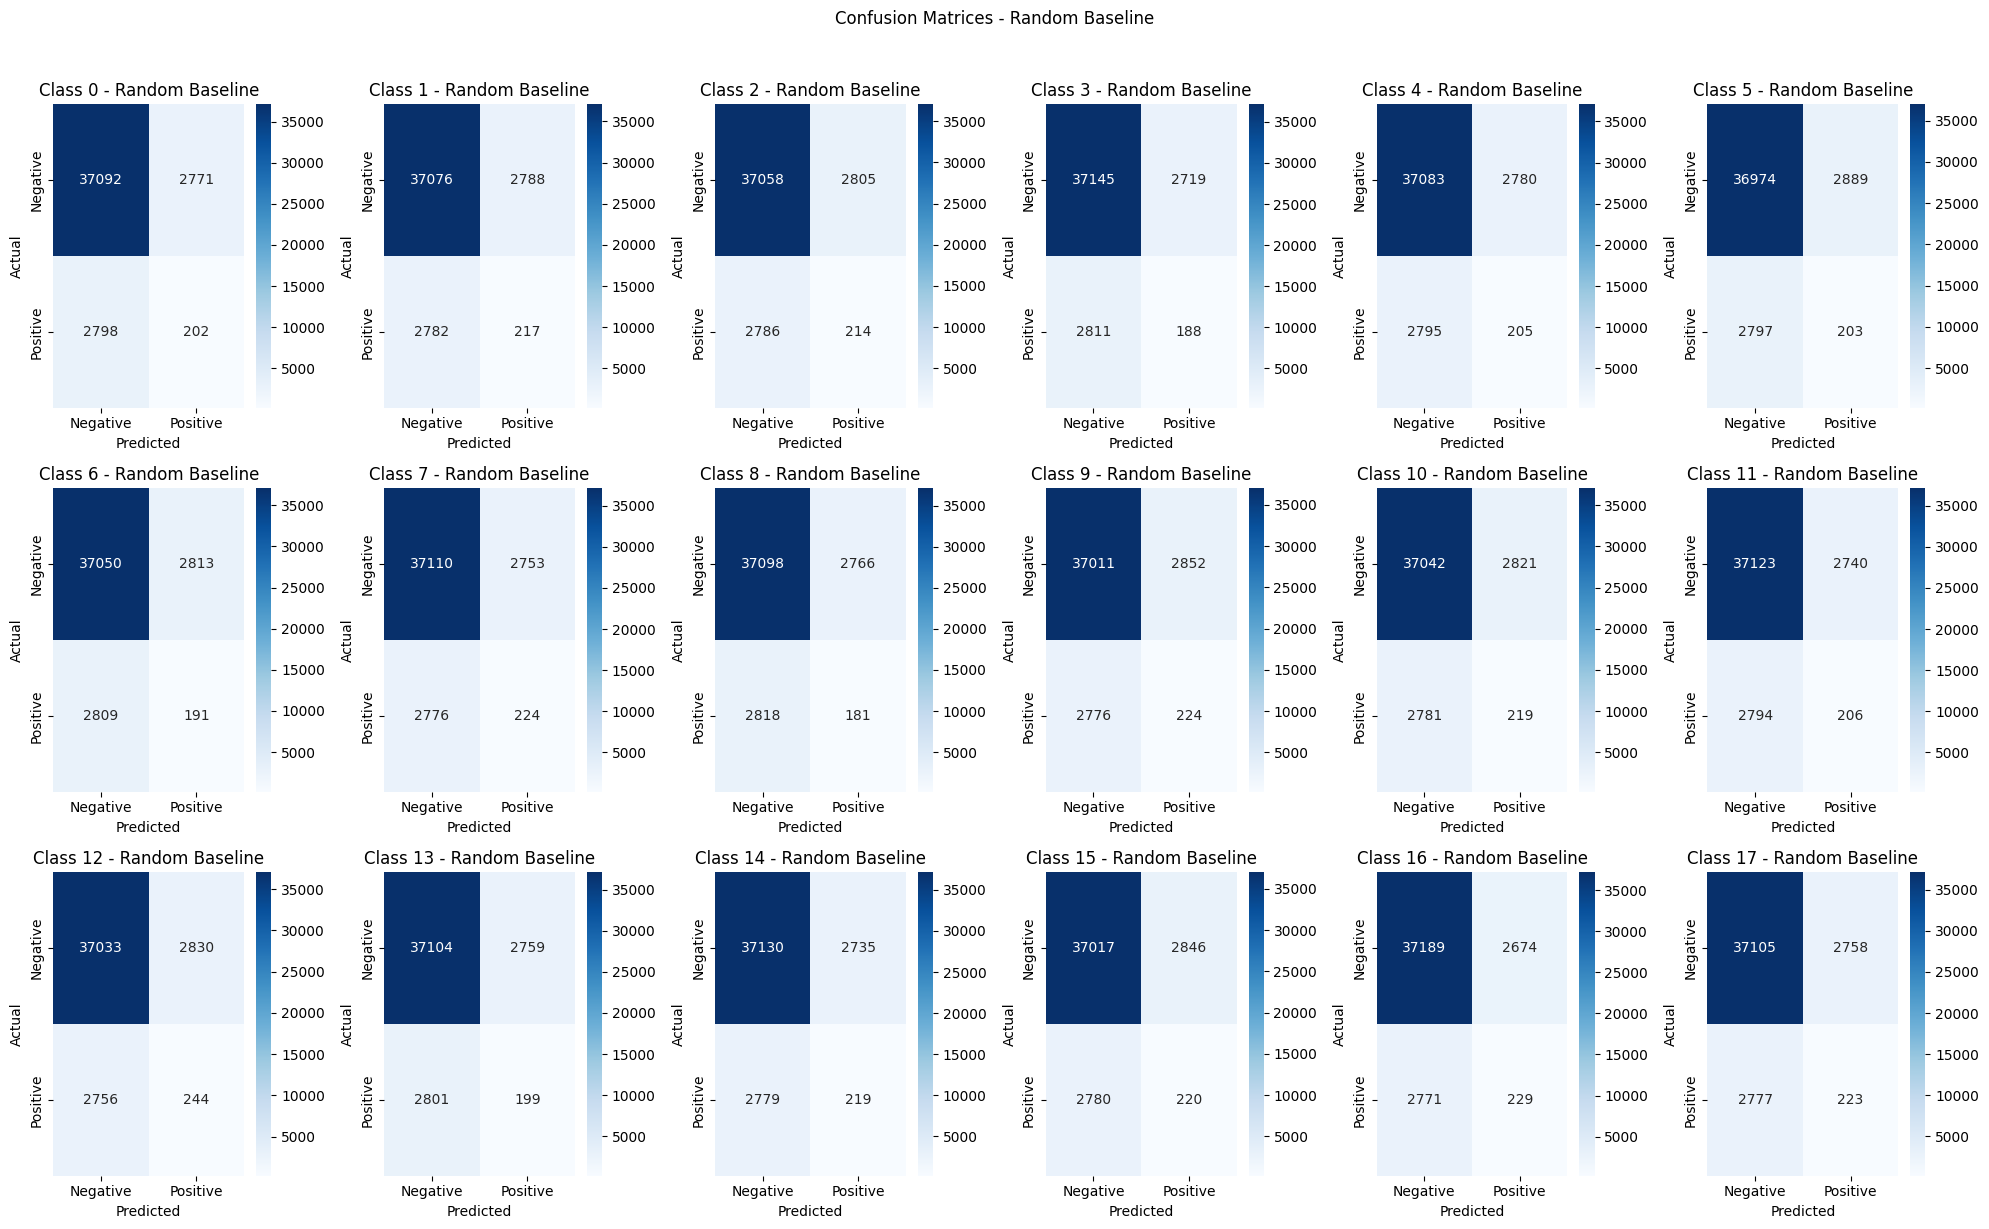

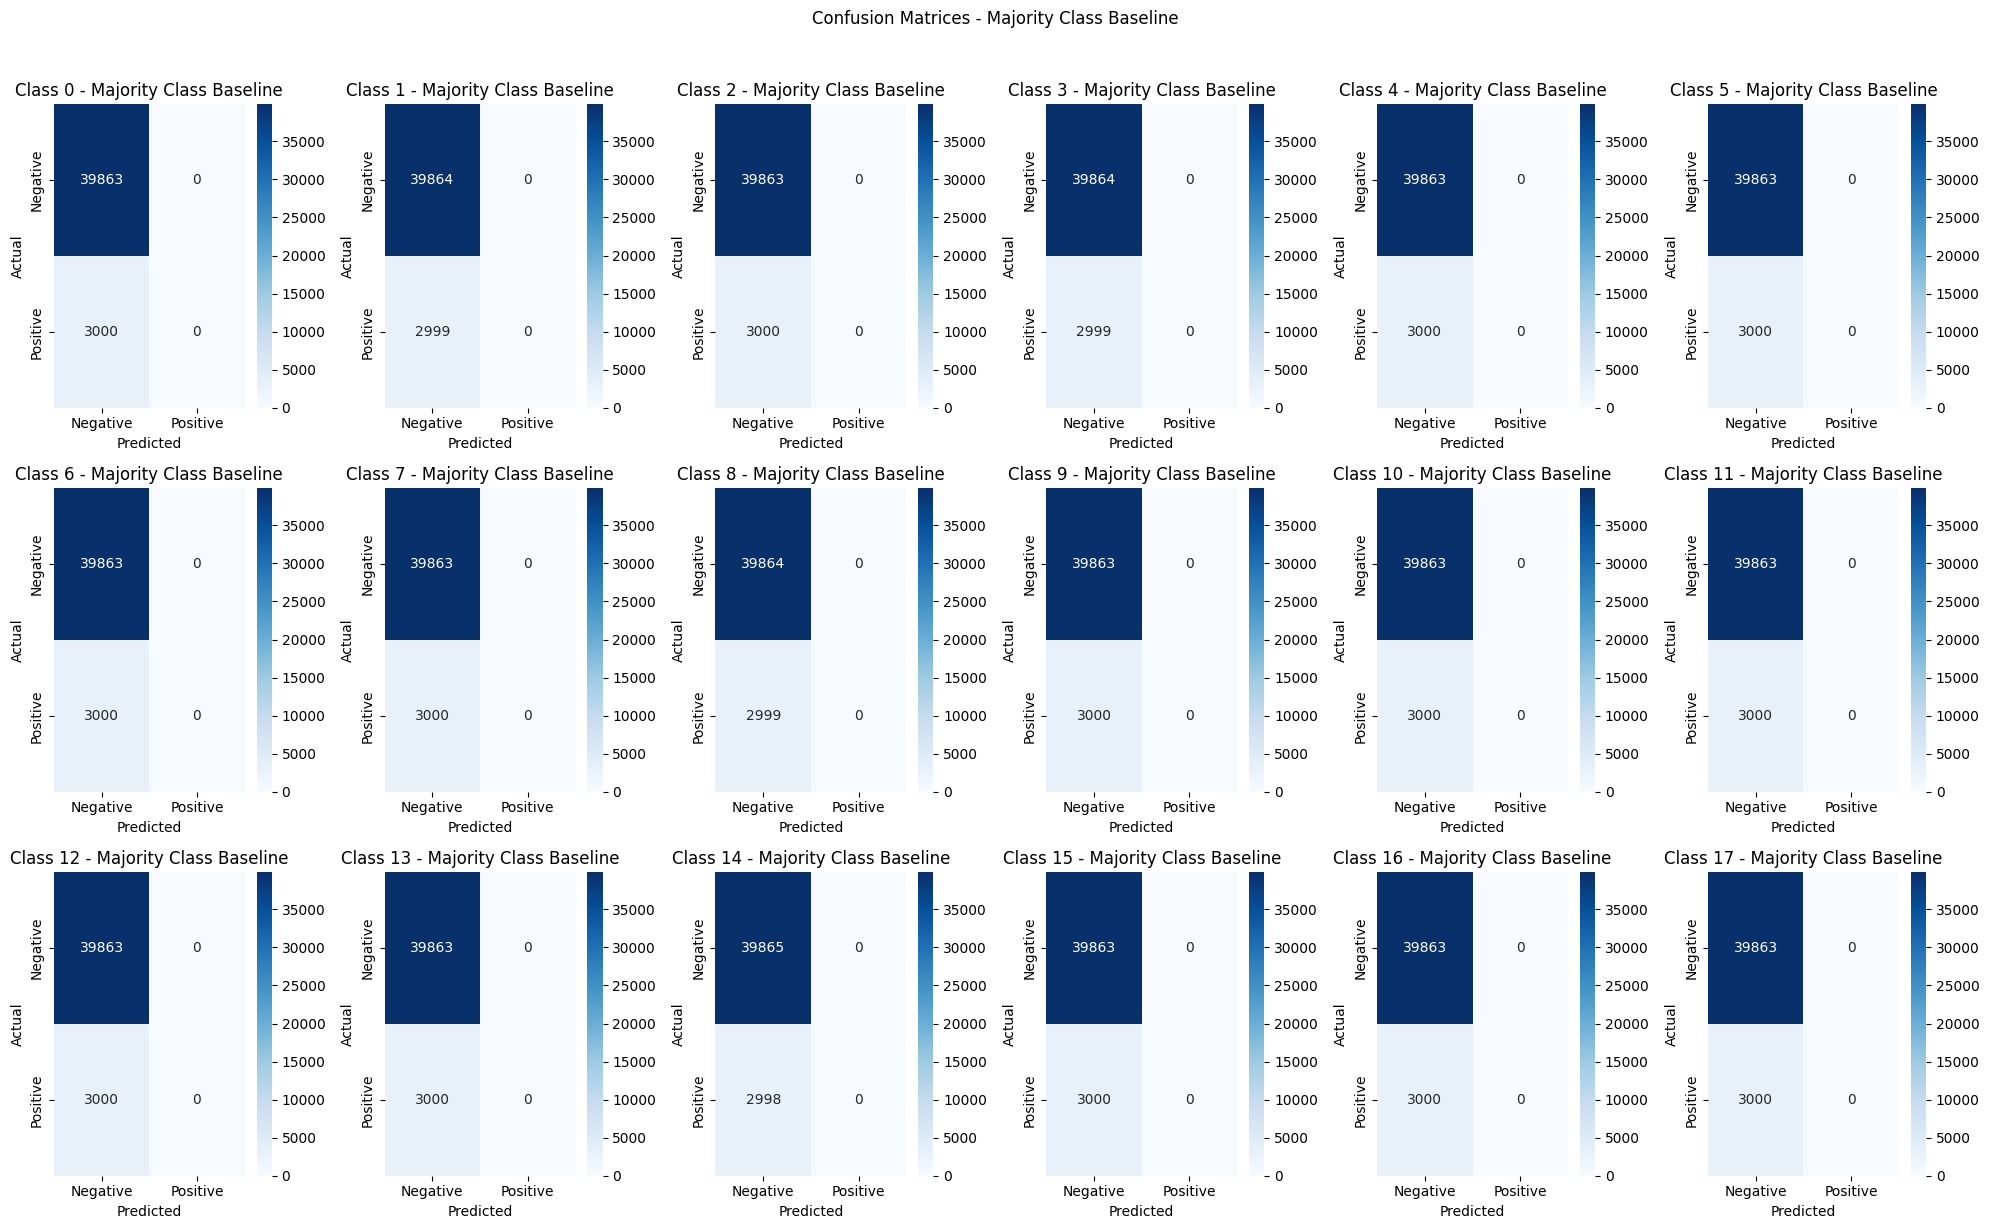

In [9]:
# Visualize label co-occurrence (which classes appear together)
def analyze_label_cooccurrence(all_labels):
    """Analyze how often different classes appear together"""
    print("\nAnalyzing label co-occurrence...")
    
    # Calculate co-occurrence matrix
    cooccurrence = np.dot(all_labels.T, all_labels)
    
    # Normalize by diagonal (self-occurrence)
    normalized_cooccurrence = cooccurrence / np.sqrt(np.outer(np.diag(cooccurrence), np.diag(cooccurrence)))
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(normalized_cooccurrence, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                xticklabels=[f'Class {i}' for i in range(18)],
                yticklabels=[f'Class {i}' for i in range(18)])
    plt.title('Normalized Label Co-occurrence Matrix')
    plt.tight_layout()
    plt.show()
    
    return cooccurrence, normalized_cooccurrence

cooccurrence, normalized_cooccurrence = analyze_label_cooccurrence(all_labels)

# Sample some sequences to understand the data better
print("\nSample sequences and their labels:")
for i in range(min(5, len(dataset))):
    sample = dataset[i]
    sequence_shape = sample['sequence'].shape
    label_indices = torch.where(sample['label'] == 1)[0].tolist()
    print(f"Sample {i}: Sequence shape: {sequence_shape}, Active classes: {label_indices}")

# Create a function to generate confusion matrices for random predictions
def create_baseline_confusion_matrices(all_labels, strategy='random'):
    """Create baseline confusion matrices for comparison"""
    
    if strategy == 'random':
        # Random predictions with same probability as class frequency
        class_probs = class_counts / len(dataset)
        y_pred_random = np.random.binomial(1, class_probs, size=all_labels.shape)
        title_suffix = "Random Baseline"
        
    elif strategy == 'majority':
        # Always predict the majority class decision for each class
        majority_pred = (class_counts > len(dataset) / 2).astype(int)
        y_pred_random = np.tile(majority_pred, (len(dataset), 1))
        title_suffix = "Majority Class Baseline"
        
    # Create confusion matrices
    fig, axes = plt.subplots(3, 6, figsize=(20, 12))
    axes = axes.flatten()
    
    for i in range(18):
        cm = confusion_matrix(all_labels[:, i], y_pred_random[:, i])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'],
                    ax=axes[i])
        axes[i].set_title(f'Class {i} - {title_suffix}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.suptitle(f'Confusion Matrices - {title_suffix}', y=1.02)
    plt.tight_layout()
    plt.show()

# Generate baseline confusion matrices
print("\nGenerating baseline confusion matrices...")
create_baseline_confusion_matrices(all_labels, strategy='random')
create_baseline_confusion_matrices(all_labels, strategy='majority')